<h1>first project</h1>

In [64]:
from sklearn.datasets import fetch_openml # type: ignore
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [65]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [66]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y.shape

(70000,)

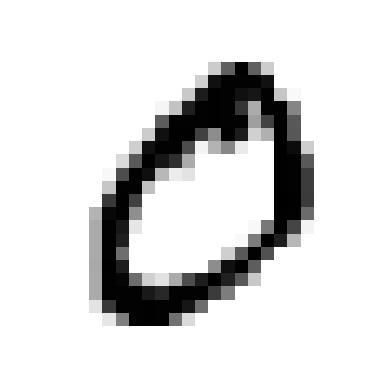

In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
some_digit = X.to_numpy()[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [69]:
y[60000]

'7'

In [70]:
y = y.astype(np.uint8)

In [71]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [72]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [73]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [74]:
sgd_clf.predict([some_digit])

c:\Users\M7600QE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [75]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [76]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [78]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)


np.float64(0.8370879772350012)

In [79]:
recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)

np.float64(0.6511713705958311)

In [80]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

np.float64(0.7325171197343847)

Multiclass Classification

In [81]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

c:\Users\M7600QE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

In [82]:
_y_pred = forest_clf.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

hw00

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [107]:
accuracy_knn = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring="accuracy")
precision_knn = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring="precision_macro")
recall_knn = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring="recall_macro")
f1_knn = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring="f1_macro")
print(f'accuracy:  {accuracy_knn}')
print(f'precision: {precision_knn}')
print(f'recall:    {recall_knn}')
print(f'f1:        {f1_knn}')

accuracy:  [0.9376 0.9411 0.9424]
precision: [0.93815822 0.94100039 0.9425902 ]
recall:    [0.93660814 0.94020762 0.94156018]
f1:        [0.93698647 0.94035426 0.94170809]


In [108]:
accuracy_knn_test = accuracy_score(y_test, y_pred)
precision_knn_test = precision_score(y_test, y_pred, average='macro')
recall_knn_test = recall_score(y_test, y_pred, average='macro')
f1_knn_test = f1_score(y_test, y_pred, average='macro')

print(f'accuracy:  {accuracy_knn_test}')
print(f'precision: {precision_knn_test}')
print(f'recall:    {recall_knn_test}')
print(f'f1:        {f1_knn_test}')

accuracy:  0.9688
precision: 0.9692753386570571
recall:    0.9684705010297703
f1:        0.9687143421292884


In [109]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')

print(f'accuracy:  {accuracy_nb}')
print(f'precision: {precision_nb}')
print(f'recall:    {recall_nb}')
print(f'f1:        {f1_nb}')

accuracy:  0.5558
precision: 0.6864966027174797
recall:    0.548447051043586
f1:        0.5089855858364396


In [111]:

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)

grid_search.fit(X, y)

best_model = grid_search.best_estimator_
best_f1 = grid_search.best_score_
best_params = grid_search.best_params_

print(f"best F1: {best_f1}")
print(f"best params {best_params}")


بهترین F1: 0.95
بهترین پارامترها: {'knn__n_neighbors': 3, 'knn__weights': 'distance'}
